In [1]:
import numpy as np

from src.utils import *
from src.SIR import Learner
import matplotlib.pyplot as plt

In [2]:
data_d = load_json("./data/data_url.json")
download_data(data_d)

In [3]:
sum_cases_province('data/time_series_19-covid-Confirmed.csv', 'data/time_series_19-covid-Confirmed-country.csv')
sum_cases_province('data/time_series_19-covid-Recovered.csv', 'data/time_series_19-covid-Recovered-country.csv')
sum_cases_province('data/time_series_19-covid-Deaths.csv', 'data/time_series_19-covid-Deaths-country.csv')

In [8]:
# 5500000
a = Learner('Italy', '3/1/20', 25_000_000, '7/20/21')

In [18]:
a.train(100, 300)
pred = a.predict()

      fun: 0.005858806431374337
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00279762, 0.02647977])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 138
      nit: 4
     njev: 46
   status: 0
  success: True
        x: array([0.51591968, 0.48454101])


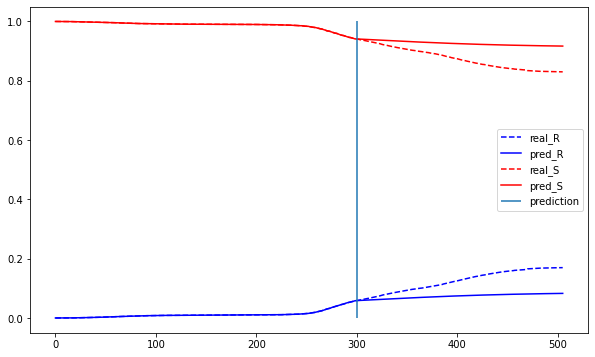

In [21]:
START_INDEX = 300
full_pred = a.predict(start_index=START_INDEX)

plt.figure(figsize=(10, 6))
plt.plot(a.immunne.values[:], '--', label='real_R', c='b')
plt.plot(np.concatenate([a.immunne.values[:START_INDEX], full_pred[2]]), '-', label='pred_R', c='b')
plt.plot(a.potencial.values[:], '--', label='real_S', c='r')
plt.plot(np.concatenate([a.potencial.values[:START_INDEX], full_pred[0]]), '-r', label='pred_S')
plt.vlines(x=START_INDEX, ymin=0, ymax=1, label='prediction')
plt.legend()
plt.show()

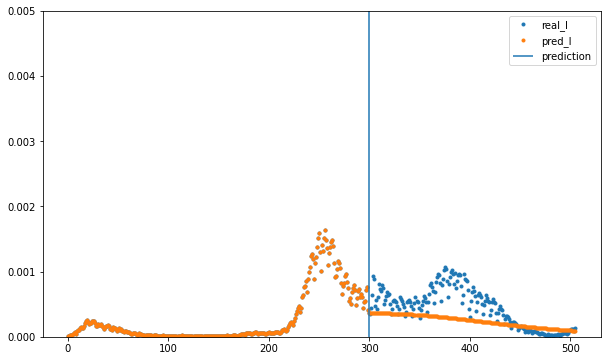

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(a.confirmed.values[:], '.', label='real_I')
plt.plot(np.concatenate([a.confirmed.values[:START_INDEX], full_pred[1]]), '.', label='pred_I')
plt.ylim(0, 0.005)
plt.vlines(x=START_INDEX, ymin=0, ymax=0.005, label='prediction')
plt.legend()
plt.show()
